In [1]:
import data
import preprocessing
import exportation
import settings

import joblib

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# *****************************************************************
# ------------------------ Program parameters ----------------------
# *****************************************************************

enseigne = 'Auchan'

# Exploration des données d'entrainement

In [2]:
df = data.data_extraction.BDD_Promo('BigQuery', enseigne)

print('Dataframe shape :', df.shape)
print('Data Columns', df.columns)


Querying BigQuery for training data...
Querying and loading time = 107.63 s 
Request finished

Dataframe shape : (198513, 37)
Data Columns Index(['Annee', 'SemaineDebut', 'NomOpe', 'DateDebutConso', 'DateFinConso',
       'Enseigne', 'DirectionRegionale', 'ZoneCVR', 'SecteurCM', 'NomMagasin',
       'CodeMagasin', 'CAMagasin', 'CAMagasinEnPromo', 'TotalVentesUCMag',
       'TotalVentesUCMagEnPromo', 'IndiceMagPromophile', 'CodeSAPProduit',
       'EANProduit', 'NomProduit', 'UmbrellaBrand', 'NBPotsParUC', 'FlagInno',
       'DureeEnMoisDepuisLancement', 'TotalVentesUCMarque',
       'IndiceMarquePromophile', 'TotalVentesProductBrandEnUC',
       'TotalVentesProductBrandPromoEnUC', 'IndiceProductBrandPromophile',
       'Mecanique', 'EncodageMecaniquePromo', 'BaselineOSA', 'PreviVol',
       'FamilleProduit', 'TauxDeDegradation', 'NBJours',
       'FacteurdDeRisqueVirtuel', 'VentesUC'],
      dtype='object')


In [3]:
#Data Cleaning
df_clean = preprocessing.training_set_preprocessing.training_set_cleaning(df)

print('Dataframe shape :', df_clean.shape)

Dataframe shape : (198513, 24)


In [4]:
df_clean.isna().sum()

SemaineDebut                           0
CAMagasin                              0
CAMagasinEnPromo                       0
TotalVentesUCMag                       0
TotalVentesUCMagEnPromo                0
IndiceMagPromophile                    0
UmbrellaBrand                        237
NBPotsParUC                          237
FlagInno                               0
DureeEnMoisDepuisLancement           237
TotalVentesUCMarque                 1910
IndiceMarquePromophile              1910
TotalVentesProductBrandEnUC         4073
TotalVentesProductBrandPromoEnUC       0
IndiceProductBrandPromophile        4073
Mecanique                              0
EncodageMecaniquePromo              1795
BaselineOSA                         3964
PreviVol                               0
FamilleProduit                      1556
TauxDeDegradation                      0
NBJours                                0
FacteurdDeRisqueVirtuel                0
VentesUC                               0
dtype: int64

In [5]:
df_clean = df_clean.dropna()
df_clean.describe()

,SemaineDebut,CAMagasin,CAMagasinEnPromo,TotalVentesUCMag,TotalVentesUCMagEnPromo,IndiceMagPromophile,NBPotsParUC,FlagInno,DureeEnMoisDepuisLancement,TotalVentesUCMarque,...,TotalVentesProductBrandEnUC,TotalVentesProductBrandPromoEnUC,IndiceProductBrandPromophile,EncodageMecaniquePromo,BaselineOSA,PreviVol,TauxDeDegradation,NBJours,FacteurdDeRisqueVirtuel,VentesUC
count,187792.000000,1.877920e+05,187792.000000,187792.000000,187792.000000,187792.000000,187792.000000,187792.0,187792.000000,1.877920e+05,...,1.877920e+05,1.877920e+05,187792.000000,187792.000000,187792.000000,187792.000000,187792.000000,187792.000000,187792.000000,187792.000000
mean,24.978977,5.817153e+05,139569.223658,278228.036508,71627.770635,0.253689,6.889591,1.0,29.514878,5.674739e+06,...,4.319075e+06,1.549071e+06,0.322170,6.142216,2.751647,19.343945,22.537973,6.787909,1.000002,106.067814
std,15.201576,2.718444e+05,73082.254666,128309.933659,37099.048622,0.033372,4.415818,0.0,44.703492,3.365675e+06,...,4.082149e+06,1.718173e+06,0.121639,2.968224,3.751279,24.432013,13.329841,1.694015,0.002887,129.116236
min,1.000000,1.564803e+05,34096.380000,78545.000000,18789.000000,0.190553,1.000000,1.0,0.000000,1.124340e+05,...,3.156800e+04,0.000000e+00,0.000000,3.000000,0.000000,0.000000,0.000000,5.000000,0.995000,1.000000
25%,11.000000,3.733083e+05,83715.720000,185080.000000,42518.000000,0.233463,4.000000,1.0,4.000000,1.924557e+06,...,1.540295e+06,4.004380e+05,0.237804,3.000000,0.000000,6.450000,20.000000,6.000000,0.997498,29.000000
50%,23.000000,5.246998e+05,127851.380000,252128.000000,65414.000000,0.254499,4.000000,1.0,12.000000,6.927067e+06,...,2.427520e+06,9.687810e+05,0.343227,6.000000,2.000000,12.420000,30.000000,6.000000,1.000004,66.000000
75%,40.000000,7.451308e+05,186166.830000,349405.000000,92113.000000,0.272685,10.000000,1.0,30.000000,9.109396e+06,...,5.617427e+06,1.550808e+06,0.408709,9.000000,4.000000,21.340000,30.000000,7.000000,1.002498,134.000000
max,52.000000,1.737671e+06,453856.900000,813743.000000,234744.000000,0.369898,24.000000,1.0,294.000000,9.109396e+06,...,1.203630e+07,4.919348e+06,0.492108,12.000000,147.000000,300.000000,50.000000,20.000000,1.005000,2801.000000


## Visualisation

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


LinAlgError: singular matrix

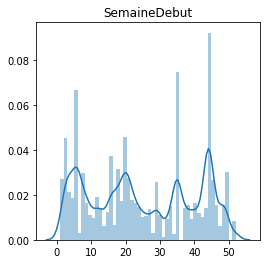

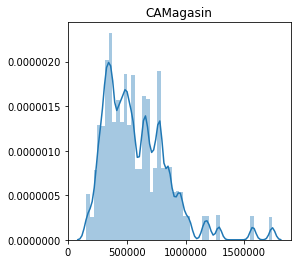

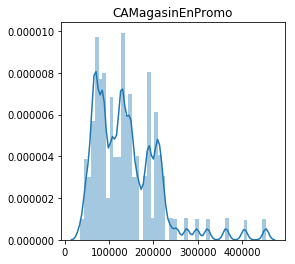

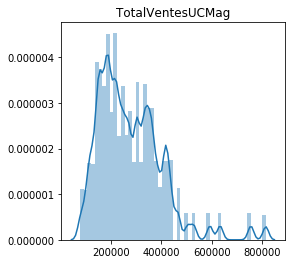

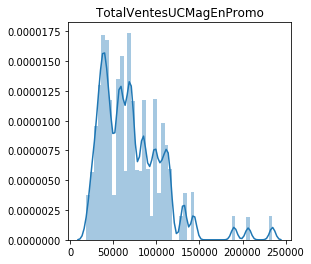

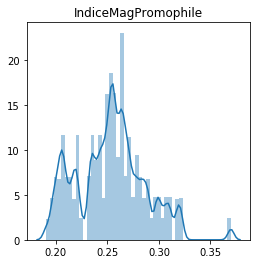

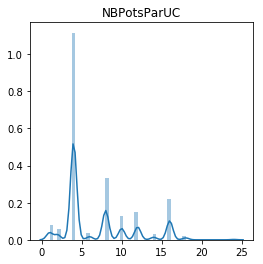

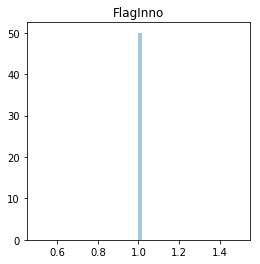

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

for col in df_clean.select_dtypes(include=numerics).columns:
    fig = plt.figure
    fig(figsize =(4,4))
    plt.title(col)
    sns.distplot(df_clean[[col]])
    

In [ ]:
sns.pairplot(df_clean[["CAMagasin","VentesUC"]], diag_kind = 'kde')

## Encodage des colonnes

In [ ]:
#Data Encoding
print('\nPerforming training data encoding')
df_encoded = preprocessing.training_set_preprocessing.feature_encoding(df_clean)
print('Data encoding finished\n')

df_encoded.describe()

In [ ]:
fig = plt.figure
fig(figsize =(12,10))

sns.heatmap(df_encoded.corr(), center = 0)
